In [1]:
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import distance
from collections import Counter
import math

%matplotlib inline

In [3]:
def cosine_sim(path1,path2):
    
    df = pd.read_csv(path1)
    df = df.drop('Unnamed: 0', axis=1)
    df2 = pd.read_csv(path2)
    df2 = df2.drop('Unnamed: 0', axis=1)
    
    for i in range(len(df2)):
        df2['Occurrences'][i] = df2['Occurrences'][i]/df2['Occurrences'].sum()
    for i in range(len(df)):
        df['Occurrences'][i] = df['Occurrences'][i]/df['Occurrences'].sum()

    num = 0
    for i in range(len(df)):
        for j in range(len(df2)):
            if df['lemma'][i] == df2['lemma'][j]:
                num = num + (df['Occurrences'][i]*df2['Occurrences'][j])
                
    df2['carré'] = df2['Occurrences']**2
    df['carré'] = df['Occurrences'] **2
    denom = (math.sqrt(df2['carré'].sum())) * (math.sqrt(df['carré'].sum()))
    final = num/denom
    
    return(final)

In [2]:
def Dice_indice(path1,path2):
    
    df = pd.read_csv(path1)
    df = df.drop('Unnamed: 0', axis=1)
    df2 = pd.read_csv(path2)
    df2 = df2.drop('Unnamed: 0', axis=1)
    
    liste = []
    for i in range(len(df)):
        for j in range(len(df2)):
            if df['lemma'][i] == df2['lemma'][j]:
                liste.append(df['lemma'][i])
    
    num = 2 * len(liste)
    denum = len(df) + len(df2)
    
    result = num/denum
    
    return(result)

In [5]:
def csv_tojaccard(path1,path2):
    
    df = pd.read_csv(path1, sep=",", header = 0)
    #df.columns = ['lemme','occurrence','apparitions_totales','2','3','4']
    df['lemma']
    liste1 = list(df["lemma"])
    
    df2 = pd.read_csv(path2, sep=",", header = 0)
    #df2.columns = ['index','lemme','occurrence']
    df2['lemma']
    liste2 = list(df2["lemma"])
    
    jaccard = distance.jaccard(liste1,liste2)
    
    return 1 - jaccard

In [7]:
def csv_todice(path1,path2):
    
    df = pd.read_csv(path1, sep=',', header = 0, encoding="UTF-8")
    df2 = pd.read_csv(path2, sep=',', header = 0, encoding="UTF-8")

    liste = df['lemma'].to_list()
    liste2 = df2['lemma'].tolist()

    x = 0
    for i in liste:
        for j in liste2:
            if i == j:
                x += 1

    return(2*x/(len(liste)+len(liste2)))

In [27]:
def pearson_sim(path1,path2):
    
    df = pd.read_csv(path1)
    df = df.drop('Unnamed: 0', axis=1)
    df2 = pd.read_csv(path2)
    df2 = df2.drop('Unnamed: 0', axis=1)
    
    for i in range(len(df2)):
        df2['Occurrences'][i] = df2['Occurrences'][i]/df2['Occurrences'].sum()
    for i in range(len(df)):
        df['Occurrences'][i] = df['Occurrences'][i]/df['Occurrences'].sum()   
        
    num = 0
    for i in range(len(df)):
        for j in range(len(df2)):
            if df['lemma'][i] == df2['lemma'][j]:
                num = num + ((df['Occurrences'][i] - df['Occurrences'].mean()) * (df2['Occurrences'][j] - df2['Occurrences'].mean()))
                
    df2['carré'] = (df2['Occurrences'] - df2['Occurrences'].mean()) ** 2
    df['carré'] = (df['Occurrences'] - df['Occurrences'].mean()) **2
    denom = (math.sqrt(df2['carré'].sum())) * (math.sqrt(df['carré'].sum()))
    final = num/denom
    
    return(final)

In [33]:
def indice_similarite(path1, path2):
    
    df = pd.read_csv(path1)
    df = df.drop('Unnamed: 0', axis=1)
    df = df[['lemma','Occurrences']]
    df2 = pd.read_csv(path2)
    df2 = df2.drop('Unnamed: 0', axis=1)
    df2 = df2[['lemma','Occurrences']]
    
        
    dic1 = dict(df.values)
    dic1 = {k: v for k, v in dic1.items()}
    dic2 = dict(df2.values)
    dic2 = {k: v for k, v in dic2.items()}
    
    for mot in dic1: 
        if mot not in dic2:
            dic2[mot] = 0
    for mot in dic2:
        if mot not in dic1:
            dic1[mot] = 0
    differences_occurences = 0
    for mot in dic1:
        differences_occurences += abs(dic1[mot] - dic2[mot])
    min_somme = 0
    max_somme = sum(list(dic1.values())) + sum(list(dic2.values()))
    differences_occurences /= max_somme

    
    return 1 - differences_occurences

In [15]:
def jaccard(path1,path2):
    
    df = pd.read_csv(path1)
    df = df.drop('Unnamed: 0', axis=1)
    df2 = pd.read_csv(path2)
    df2 = df2.drop('Unnamed: 0', axis=1)
    
    for i in range(len(df2)):
        df2['Occurrences'][i] = df2['Occurrences'][i]/df2['Occurrences'].sum()
    for i in range(len(df)):
        df['Occurrences'][i] = df['Occurrences'][i]/df['Occurrences'].sum()

    num = 0
    for i in range(len(df)):
        for j in range(len(df2)):
            if df['lemma'][i] == df2['lemma'][j]:
                num = num + (df['Occurrences'][i]*df2['Occurrences'][j])
                
    df2['carré'] = df2['Occurrences']**2
    df['carré'] = df['Occurrences'] **2
    denom = (math.sqrt(df2['carré'].sum())) * (math.sqrt(df['carré'].sum()))
    final = num/(denom - num)
    
    return(final)

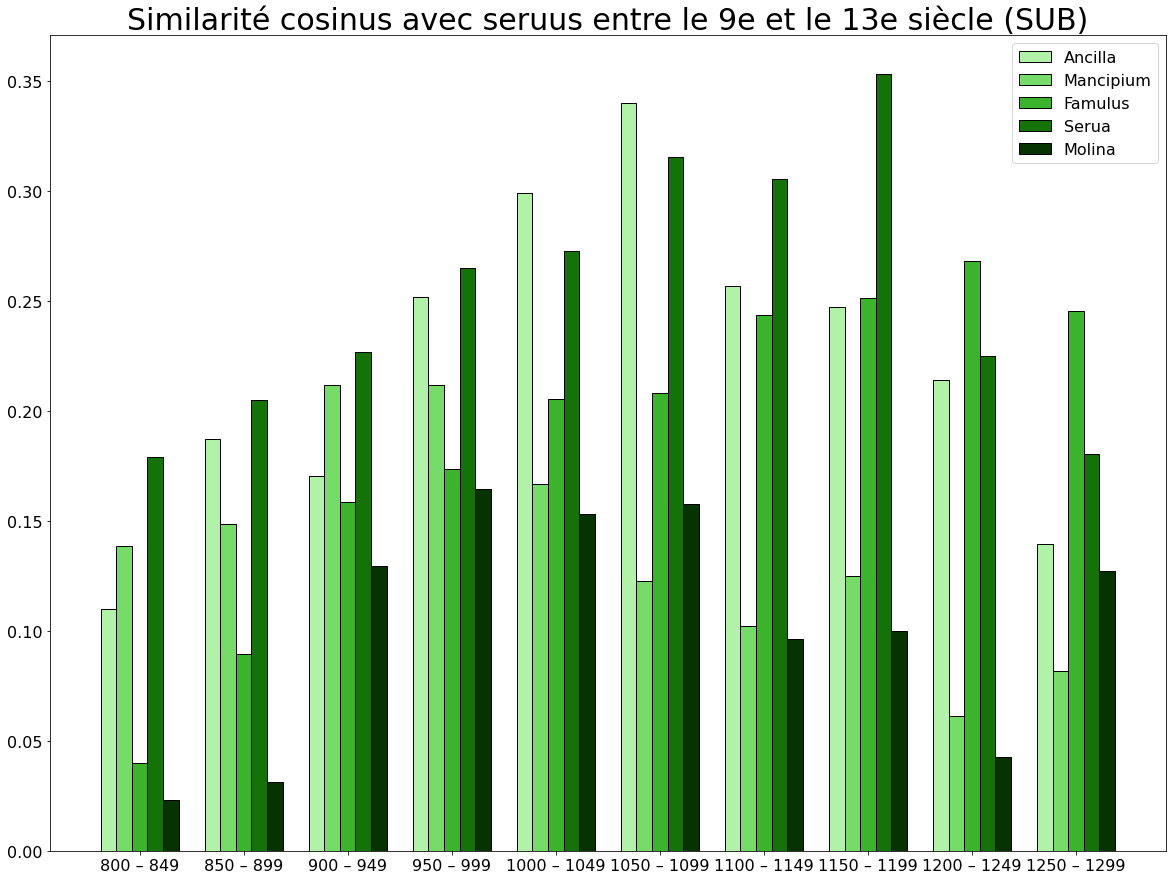

In [39]:
liste_dates = ["800 – 849","850 – 899","900 – 949","950 – 999","1000 – 1049","1050 – 1099","1100 – 1149","1150 – 1199","1200 – 1249",
               "1250 – 1299"]

path = "/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/f"{lemme}"

samples = ["Ancilla","Mancipium","Serua","Molina","Famulus"]
sample = "Seruus"

grammar = ["QLF","SUB","VBE"]

Mancipium = []
Ancilla = []
Serua = []
Molina = []
Famulus = []

liste_QLF_Ancilla = []
liste_SUB_Ancilla = []
liste_VBE_Ancilla = []

liste_QLF_Mancipium = []
liste_SUB_Mancipium = []
liste_VBE_Mancipium = []

liste_QLF_Serua = []
liste_SUB_Serua = []
liste_VBE_Serua = []

liste_QLF_Molina = []
liste_SUB_Molina = []
liste_VBE_Molina = []

liste_QLF_Famulus = []
liste_SUB_Famulus = []
liste_VBE_Famulus = []

liste = []

files = ["800-849","850-899","900-949","950-999","1000-1049","1050-1099","1100-1149","1150-1199","1200-1249","1250-1299"]

for sample_ij in samples:
    for gram in grammar:
        for file in files:
            path_ij = path + sample_ij + "/Cooccurrences/" + gram + "/" + file + ".csv"
            path_seruus = path + sample + "/Cooccurrences/" + gram + "/" + file + ".csv"
            liste.append(Dice_indice(path_seruus,path_ij))
            
Ancilla.extend(liste[:30])
del liste[:30]
Mancipium.extend(liste[:30])
del liste[:30]
Serua.extend(liste[:30])
del liste[:30]
Molina.extend(liste[:30])
del liste[:30]
Famulus.extend(liste[:30])
del liste[:30]

liste_QLF_Ancilla.extend(Ancilla[:10])
del Ancilla[:10]
liste_SUB_Ancilla.extend(Ancilla[:10])
del Ancilla[:10]
liste_VBE_Ancilla.extend(Ancilla[:10])
del Ancilla[:10]

liste_QLF_Mancipium.extend(Mancipium[:10])
del Mancipium[:10]
liste_SUB_Mancipium.extend(Mancipium[:10])
del Mancipium[:10]
liste_VBE_Mancipium.extend(Mancipium[:10])
del Mancipium[:10]

liste_QLF_Serua.extend(Serua[:10])
del Serua[:10]
liste_SUB_Serua.extend(Serua[:10])
del Serua[:10]
liste_VBE_Serua.extend(Serua[:10])
del Serua[:10]

liste_QLF_Molina.extend(Molina[:10])
del Molina[:10]
liste_SUB_Molina.extend(Molina[:10])
del Molina[:10]
liste_VBE_Molina.extend(Molina[:10])
del Molina[:10]

liste_QLF_Famulus.extend(Famulus[:10])
del Famulus[:10]
liste_SUB_Famulus.extend(Famulus[:10])
del Famulus[:10]
liste_VBE_Famulus.extend(Famulus[:10])
del Famulus[:10]


w = 0.15
c = '#b1f2a8'
c2 = '#77db6a'
c3 = '#3cb32d'
c4 = "#157209"
c5 = "#073302"

plt.figure(figsize=(20,15))

Ancilla_bar = np.arange(len(liste_dates), dtype=int)
Mancipium_bar = [i + w for i in Ancilla_bar]
Famulus_bar = [i + 2*w for i in Ancilla_bar]
Serua_bar = [i + 3*w for i in Ancilla_bar]
Molina_bar = [i + 4*w for i in Ancilla_bar]



plt.bar(Ancilla_bar,liste_QLF_Ancilla, width=w, label="Ancilla", color=c, edgecolor='black')
plt.bar(Mancipium_bar, liste_QLF_Mancipium, width=w,label="Mancipium", color = c2,edgecolor='black')
plt.bar(Famulus_bar,liste_QLF_Famulus, width=w, label="Famulus", color = c3,edgecolor='black')
plt.bar(Serua_bar, liste_QLF_Serua, width=w, label="Serua", color = c4,edgecolor='black')
plt.bar(Molina_bar, liste_QLF_Molina, width=w, label="Molina", color = c5,edgecolor='black')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
#plt.xticks(QLF_bar,liste_dates, ha = "left")

QLF_bar_2 = [Qi+0.3 for Qi in Ancilla_bar]

plt.xticks(QLF_bar_2,liste_dates, ha = "center")

plt.title("Similarité cosinus avec seruus entre le 9e et le 13e siècle (QLF)", fontsize=30)
plt.legend(fontsize=16)
plt.savefig('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Indices/Perso/Indice de similarité personnel avec seruus entre le 9e et le 13e siècle (SUB).png', dpi= 300)
plt.show()

In [42]:
0.40227030862007807 + 0.026347235857512148 + 0.26718119968857484 + 0.36459381169674027 +0.026347235857512148

1.0867397917204173

In [41]:
0.18796992481203012 + 0.2608695652173913 + 0.267579825051285 + 0.36533650246598043 + 0.19898753019227505

1.2807433477389618

In [40]:
0.10978956999085088 + 0.2838709677419355 + 0.2305234508574119 + 0.29958476462249495 + 0.1854542593204221

1.1092230125331153

In [85]:
Ancilla = [150,43.291603646057574,33.22069470714151,47.66540595854954,30.789663383555855,39.38760109301379]
Mancipium = [43.291603646057574,150,23.680435907183963,41.627803662299065,32.26840906776946,32.602106641698654]
Famulus = [33.22069470714151,23.680435907183963,150,29.22029704234456,25.181399137915196,36.19213281947696]
Serua = [47.66540595854954,41.627803662299065,29.22029704234456,150,32.442336803480835,39.556390672636006]
Molina = [30.789663383555855,32.26840906776946,25.18139913791519632,44.2336803480835,150,26.128376278023197]
Seruus = [39.38760109301379,32.602106641698654,36.19213281947696,39.556390672636006,26.128376278023197,150]

In [86]:
df = pd.DataFrame(Ancilla)
df['Mancipium'] = Mancipium
df['Famulus'] = Famulus
df['Serua'] = Serua
df['Molina'] = Molina
df['Seruus'] = Seruus
df.columns = ["Ancilla","Mancipium","Famulus","Serua","Molina","Seruus"]

In [70]:
df

,Ancilla,Mancipium,Famulus,Serua,Molina,Seruus
0,150.000000,43.291604,33.220695,47.665406,3.078966e+01,26.128376
1,43.291604,150.000000,3.680436,41.627804,3.226841e+01,32.602107
2,33.220695,23.680436,150.000000,29.220297,2.518140e+01,36.192133
3,47.665406,41.627804,29.220297,150.000000,4.423368e+14,39.556391
4,30.789663,32.268409,25.181399,32.442337,1.500000e+02,26.128376
5,39.387601,32.602107,36.192133,39.556391,2.612838e+01,150.000000


In [96]:
import numpy as np
import seaborn as sns


corr =  df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

plt.figure(figsize=(10,8))

y_axis_label = ["Ancilla","Mancipium","Famulus","Serua","Molina","Seruus"]
ax = sns.heatmap(corr,mask=mask,vmin = 20, vmax = 50,annot=True,
                 cmap='Greens',yticklabels=y_axis_label,square=True,cmap = cmap)


results_path = 'sim.png'
plt.savefig(results_path, dpi=400)

SyntaxError: keyword argument repeated: cmap (1512965456.py, line 13)

<Figure size 720x576 with 0 Axes>